<a href="https://colab.research.google.com/github/nawrintabassumorpita/project/blob/main/1908043%2C49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stroke Prediction Dataset
Context: According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information:

id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient


In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, f1_score, precision_score,
                             recall_score)


## Dataset

In [ ]:
# Download the data
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0

--2024-10-29 05:52:14--  https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/dxgo5oqy5fd1pho88bkn4/healthcare-dataset-stroke-data.csv?rlkey=wozpcthdtj4xjquskkkk451t2&dl=0 [following]
--2024-10-29 05:52:14--  https://www.dropbox.com/scl/fi/dxgo5oqy5fd1pho88bkn4/healthcare-dataset-stroke-data.csv?rlkey=wozpcthdtj4xjquskkkk451t2&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6c02f816ed323f7824c49b98a7.dl.dropboxusercontent.com/cd/0/inline/CdXOwTIBEiwsmX2YNzOxKVmiXibe_l4GADOHvZNdwt9TZX-GZaqvfrUhbQ7hLAbB4ZAXI7RSg9Q3GpY7I67f-tHn52r0rClo83JeC4rvfuSiLAThhfgQ43GX2KmeOW9Jle5IdDFaKZWrnDMP5vnwcrgL/file# [following]
--2024-10-29 05:52:1

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('stroke-data.csv')
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
print(dataset.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


#Visualize Dataset Columns#

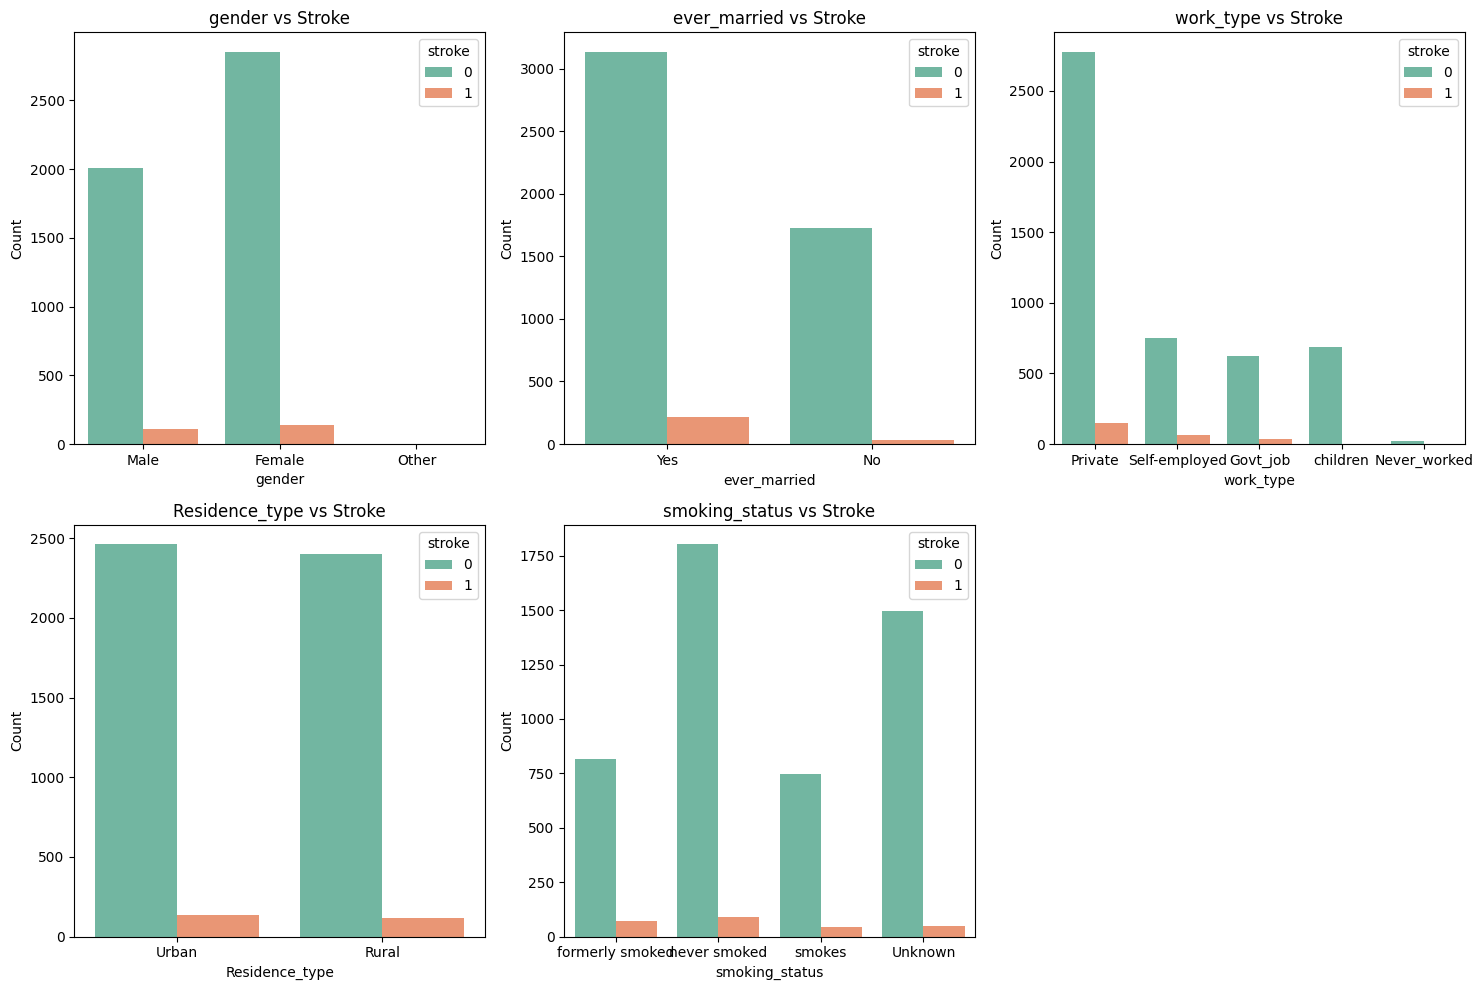

In [ ]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=dataset, x=column, hue='stroke', palette='Set2')
    plt.title(f'{column} vs Stroke')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


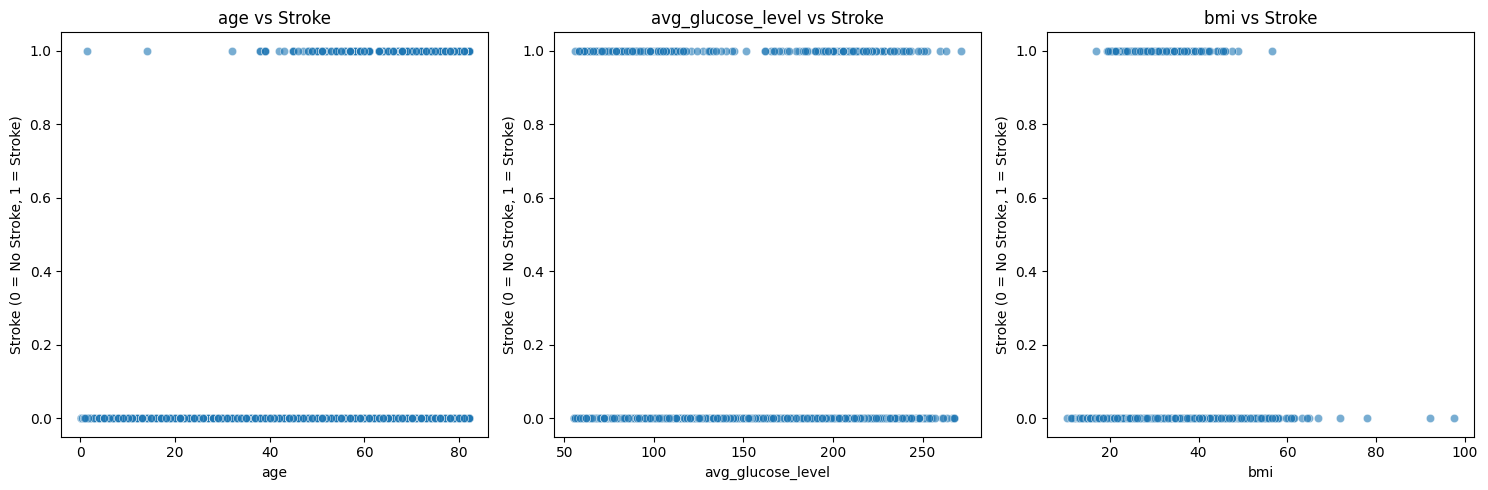

In [ ]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=dataset, x=column, y='stroke', alpha=0.6)
    plt.title(f'{column} vs Stroke')
    plt.xlabel(column)
    plt.ylabel('Stroke (0 = No Stroke, 1 = Stroke)')

plt.tight_layout()
plt.show()


#Checking NULL Columns#

In [ ]:
columns_to_check = ['gender', 'age', 'hypertension', 'heart_disease',
                    'ever_married', 'work_type', 'Residence_type',
                    'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

null_counts = dataset[columns_to_check].isnull().sum()

print(null_counts)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
null_bmi_data = dataset[dataset['bmi'].isnull()]

stroke_counts = null_bmi_data['stroke'].value_counts()

print("Count of rows with null 'bmi' and stroke=1:", stroke_counts.get(1, 0))
print("Count of rows with null 'bmi' and stroke=0:", stroke_counts.get(0, 0))


Count of rows with null 'bmi' and stroke=1: 40
Count of rows with null 'bmi' and stroke=0: 161


#Selecting features for training#

In [ ]:
features = dataset[['age',	'hypertension',	'heart_disease',	'bmi','Residence_type','avg_glucose_level',	'smoking_status']]
target = dataset[['stroke']]

In [ ]:
features

,age,hypertension,heart_disease,bmi,Residence_type,avg_glucose_level,smoking_status
0,67.0,0,1,36.6,Urban,228.69,formerly smoked
1,61.0,0,0,NaN,Rural,202.21,never smoked
2,80.0,0,1,32.5,Rural,105.92,never smoked
3,49.0,0,0,34.4,Urban,171.23,smokes
4,79.0,1,0,24.0,Rural,174.12,never smoked
...,...,...,...,...,...,...,...
5105,80.0,1,0,NaN,Urban,83.75,never smoked
5106,81.0,0,0,40.0,Urban,125.20,never smoked
5107,35.0,0,0,30.6,Rural,82.99,never smoked
5108,51.0,0,0,25.6,Rural,166.29,formerly smoked


## Taking care of missing values

In [ ]:
# imputer = SimpleImputer(missing_values=np.nan,strategy = "mean")
# imputer = imputer.fit(features[['age',	'hypertension',	'heart_disease','bmi','avg_glucose_level']])

imputer = SimpleImputer(missing_values=np.nan,strategy = "mean")
imputer = imputer.fit(features[['bmi']])

In [ ]:
# features[['age',	'hypertension',	'heart_disease','bmi','avg_glucose_level']]= imputer.transform(features[['age',	'hypertension',	'heart_disease','bmi','avg_glucose_level']])

features[['bmi']]= imputer.transform(features[['bmi']])

In [ ]:
features

,age,hypertension,heart_disease,bmi,Residence_type,avg_glucose_level,smoking_status
0,67.0,0,1,36.600000,Urban,228.69,formerly smoked
1,61.0,0,0,28.893237,Rural,202.21,never smoked
2,80.0,0,1,32.500000,Rural,105.92,never smoked
3,49.0,0,0,34.400000,Urban,171.23,smokes
4,79.0,1,0,24.000000,Rural,174.12,never smoked
...,...,...,...,...,...,...,...
5105,80.0,1,0,28.893237,Urban,83.75,never smoked
5106,81.0,0,0,40.000000,Urban,125.20,never smoked
5107,35.0,0,0,30.600000,Rural,82.99,never smoked
5108,51.0,0,0,25.600000,Rural,166.29,formerly smoked


In [ ]:
# imputer = SimpleImputer(missing_values=np.nan,strategy = "mean")
# imputer = imputer.fit(target[['stroke']])

In [ ]:
# target[['stroke']]= imputer.transform(target[['stroke']])

In [ ]:
# target

## Encoding

In [ ]:
labelencoder_f = LabelEncoder()
features['Residence_type'] = labelencoder_f.fit_transform(features['Residence_type'])

In [ ]:
features

,age,hypertension,heart_disease,bmi,Residence_type,avg_glucose_level,smoking_status
0,67.0,0,1,36.600000,1,228.69,formerly smoked
1,61.0,0,0,28.893237,0,202.21,never smoked
2,80.0,0,1,32.500000,0,105.92,never smoked
3,49.0,0,0,34.400000,1,171.23,smokes
4,79.0,1,0,24.000000,0,174.12,never smoked
...,...,...,...,...,...,...,...
5105,80.0,1,0,28.893237,1,83.75,never smoked
5106,81.0,0,0,40.000000,1,125.20,never smoked
5107,35.0,0,0,30.600000,0,82.99,never smoked
5108,51.0,0,0,25.600000,0,166.29,formerly smoked


In [ ]:
encoder=OneHotEncoder(sparse_output=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(features[['smoking_status']]))
# features['smoking_status'] = labelencoder_f.fit_transform(features['smoking_status'])

In [ ]:
encoded_labels

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
5105,0.0,0.0,1.0,0.0
5106,0.0,0.0,1.0,0.0
5107,0.0,0.0,1.0,0.0
5108,0.0,1.0,0.0,0.0


In [ ]:
encoded_labels.columns = encoder.get_feature_names_out(['smoking_status'])
dataset= pd.concat([features, encoded_labels ], axis=1)

In [ ]:
dataset

,age,hypertension,heart_disease,bmi,Residence_type,avg_glucose_level,smoking_status,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,36.600000,1,228.69,formerly smoked,0.0,1.0,0.0,0.0
1,61.0,0,0,28.893237,0,202.21,never smoked,0.0,0.0,1.0,0.0
2,80.0,0,1,32.500000,0,105.92,never smoked,0.0,0.0,1.0,0.0
3,49.0,0,0,34.400000,1,171.23,smokes,0.0,0.0,0.0,1.0
4,79.0,1,0,24.000000,0,174.12,never smoked,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,28.893237,1,83.75,never smoked,0.0,0.0,1.0,0.0
5106,81.0,0,0,40.000000,1,125.20,never smoked,0.0,0.0,1.0,0.0
5107,35.0,0,0,30.600000,0,82.99,never smoked,0.0,0.0,1.0,0.0
5108,51.0,0,0,25.600000,0,166.29,formerly smoked,0.0,1.0,0.0,0.0


In [ ]:
dataset.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'Residence_type',
       'avg_glucose_level', 'smoking_status', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [ ]:
new_features = dataset[['age', 'hypertension', 'heart_disease', 'bmi',
       'avg_glucose_level','Residence_type',
       'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']]

#Normalization#

In [ ]:
scaler = StandardScaler()

new_features[['age', 'bmi', 'avg_glucose_level']] = scaler.fit_transform(new_features[['age', 'bmi', 'avg_glucose_level']])

In [ ]:
new_features

,age,hypertension,heart_disease,bmi,avg_glucose_level,Residence_type,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,1.001234e+00,2.706375,1,0.0,1.0,0.0,0.0
1,0.786070,0,0,4.615554e-16,2.121559,0,0.0,0.0,1.0,0.0
2,1.626390,0,1,4.685773e-01,-0.005028,0,0.0,0.0,1.0,0.0
3,0.255342,0,0,7.154182e-01,1.437358,1,0.0,0.0,0.0,1.0
4,1.582163,1,0,-6.357112e-01,1.501184,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,1,0,4.615554e-16,-0.494658,1,0.0,0.0,1.0,0.0
5106,1.670617,0,0,1.442949e+00,0.420775,1,0.0,0.0,1.0,0.0
5107,-0.363842,0,0,2.217363e-01,-0.511443,0,0.0,0.0,1.0,0.0
5108,0.343796,0,0,-4.278451e-01,1.328257,0,0.0,1.0,0.0,0.0


In [ ]:
target

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


## Splitting Dataset

In [ ]:
"""Spliting the Dataset into Training Set and Test Set """

# X_train,X_test,y_train,y_test=train_test_split(new_features,target,test_size=0.3,random_state=0)

X_train,X_test,y_train,y_test=train_test_split(new_features,target,test_size=0.3,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3577, 10)
(1533, 10)


In [ ]:
X_test

,age,hypertension,heart_disease,bmi,avg_glucose_level,Residence_type,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
42,1.714845,0,1,-0.323912,0.855854,1,0.0,0.0,0.0,1.0
380,-1.734890,0,0,-1.584100,0.001597,0,1.0,0.0,0.0,0.0
3524,0.653388,0,0,-0.388870,-0.578582,1,0.0,0.0,1.0,0.0
352,-1.027252,0,0,0.676443,-0.211525,0,0.0,0.0,1.0,0.0
4927,-1.469526,0,0,-1.973849,-0.801863,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
929,1.405253,0,1,0.208745,2.241481,1,0.0,1.0,0.0,0.0
2629,0.078432,0,0,2.131506,1.461652,1,0.0,1.0,0.0,0.0
663,-0.231159,0,0,-0.596736,-0.163821,0,0.0,0.0,1.0,0.0
2303,1.405253,0,0,0.585502,2.500983,0,0.0,0.0,0.0,1.0


## Different types of Regression Algorithm

1. Logistic Regression
2. K Nearest Neighbor (KNN)
3. Decision Tree Classifier
4. Random Forest Classifier
5. Naive Bayes
6. Support Vector Machine (SVM)




## Logistic Regression

In [ ]:
# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# prediction
y_pred = lr.predict(X_test)

In [ ]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred)

array([[1457,    0],
       [  75,    1]])

In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1457
         Yes       1.00      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.95      0.95      0.93      1533



## KNN Classifiers

In [ ]:
# Classifier Model
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))


[[1437   20]
 [  72    4]]


In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.95      0.99      0.97      1457
         Yes       0.17      0.05      0.08        76

    accuracy                           0.94      1533
   macro avg       0.56      0.52      0.52      1533
weighted avg       0.91      0.94      0.92      1533



## Support Vector Machine

In [ ]:
# Classifier Model
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))


[[1457    0]
 [  76    0]]


In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1457
         Yes       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



## Decision Tree

In [ ]:
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))


[[1395   62]
 [  64   12]]


In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.96      0.96      0.96      1457
         Yes       0.16      0.16      0.16        76

    accuracy                           0.92      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.92      0.92      0.92      1533



## Random Forest Classifier

In [ ]:
# Classifier Model
classifier = RandomForestClassifier(n_estimators=32, criterion ='entropy', random_state = 40)
classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=32, random_state=40)

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))


[[1456    1]
 [  74    2]]


In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1457
         Yes       0.67      0.03      0.05        76

    accuracy                           0.95      1533
   macro avg       0.81      0.51      0.51      1533
weighted avg       0.94      0.95      0.93      1533



## Result Analysis

In this project, different classification algorithm was used to classify or predict stroke from dataset. The evaluation matrices to evaluate classification algorithms are Precision, Recall, F1 Score and Accuracy. Here for comparision purposes, the weighted average of models with accuracy will be considered.

### Logistic Regression
1. Weighted Average Precision  : 90%
2. Weighted Average Recall     : 95%
3. Weighted Average F1-Score   : 93%
4. Accuracy                    : 95%

### KNN Classifier
1. Weighted Average Precision  : 91%
2. Weighted Average Recall     : 94%
3. Weighted Average F1-Score   : 92%
4. Accuracy                    : 94%
### Support Vector Machine
1. Weighted Average Precision  : 90%
2. Weighted Average Recall     : 95%
3. Weighted Average F1-Score   : 93%
4. Accuracy                    : 95%

### Decision Tree Classification
1. Weighted Average Precision  : 92%
2. Weighted Average Recall     : 92%
3. Weighted Average F1-Score   : 92%
4. Accuracy                    : 92%

### Random Forest Classification
1. Weighted Average Precision  : 94%
2. Weighted Average Recall     : 95%
3. Weighted Average F1-Score   : 93%
4. Accuracy                    : 95%

## Discussion
In this project, several classifiers are used to predict Stroke from **"Stroke Dataset"**. The classifiers used in this project are **Logistic Regression, K-Nearest Neighbor, Support Vector Machine, Decision Tree & Random Forest Classifier**. First the libraries for procedure were imported and then the dataset was stored from dropbox. Then some data pre-processing were done which includes **encoding (label encoding, one hot encoding), feature scaling, taking care of missing files.** Then the dataset was splitted and trained into the classifiers. Then some evaluation matrices were used to evaluate the the classifiers and the comparision based on evaluation was shown in Result Analysis. From the comparision, it is seen that the Random Forest Classifier has the highest evaalution values.